In [1]:
import pandas as pd
from pathlib import Path

In [2]:
notebook_dir = Path.cwd()
return_data = pd.read_parquet(notebook_dir / 'data' / 'returns_per_period' / 'lag_60_cov' / 'returns_2016.parquet')
return_data

,stock,date,return,stock_return_sequence,Class0,Class1,oil_return_sequence,vix_sequence,t103m_sequence,dgs2_sequence,gold_return_sequence
0,A.N,2013-04-02,-0.467839,"[0.2011600503125503, 1.2637258599311907, -0.50...",1,0,"[-0.05679968187990639, 0.13895341825274715, 0....","[-0.14122172448043413, -0.36209528710091243, -...","[-1.3700915374731144, -1.3098615644206189, -1....","[1.247656200724813, 0.19651215008050682, -0.22...","[0.1265089022322649, -1.4147953569133427, -0.1..."
1,A.N,2013-04-03,-0.260568,"[1.2637258599311907, -0.5096550735708693, -0.5...",0,1,"[0.13895341825274715, 0.10177927361986329, 0.0...","[-0.36209528710091243, -0.3741979480664184, -0...","[-1.3098615644206189, -1.3399765509468666, -1....","[0.19651215008050682, -0.22394547017721578, -0...","[-1.4147953569133427, -0.10174050396919285, -1..."
2,A.N,2013-04-04,1.409424,"[-0.5096550735708693, -0.5594611075493163, 1.7...",0,1,"[0.10177927361986329, 0.027782557268058658, 0....","[-0.3741979480664184, -0.42563425716981734, -0...","[-1.3399765509468666, -1.4303215105256102, -1....","[-0.22394547017721578, -0.6444030904349383, -0...","[-0.10174050396919285, -1.119180847241471, 0.8..."
3,A.N,2013-04-05,0.172086,"[-0.5594611075493163, 1.740911716250903, 0.450...",0,1,"[0.027782557268058658, 0.022489790384244902, 0...","[-0.42563425716981734, -0.3681466175836651, -0...","[-1.4303215105256102, -1.4303215105256102, -1....","[-0.6444030904349383, -0.22394547017721578, 0....","[-1.119180847241471, 0.8487479067540266, 0.034..."
4,A.N,2013-04-08,0.155618,"[1.740911716250903, 0.4509340261236065, -0.395...",1,0,"[0.022489790384244902, 0.42953863039210044, -0...","[-0.3681466175836651, -0.4649679053077104, -0....","[-1.4303215105256102, -1.3399765509468666, -1....","[-0.22394547017721578, 0.6169697703382293, -0....","[0.8487479067540266, 0.03455585272012497, 0.12..."
...,...,...,...,...,...,...,...,...,...,...,...
466862,ZTS.N,2016-12-23,0.607474,"[-0.9614310338548949, 1.2411393421021077, 0.40...",0,1,"[0.8648433170288026, 0.470802986827811, 0.6304...","[-0.3046076475147607, -0.525481210135239, -0.4...","[-2.9963008098904966, -2.966185823364249, -2.9...","[-0.22394547017721578, 0.8271985804670907, 0.6...","[0.22088491907951088, -0.5171706581688778, -0...."
466863,ZTS.N,2016-12-27,-0.107585,"[1.2411393421021077, 0.4080592991589671, -0.09...",1,0,"[0.470802986827811, 0.6304597545396611, -0.072...","[-0.525481210135239, -0.4407625833766991, -0.4...","[-2.966185823364249, -2.966185823364249, -2.81...","[0.8271985804670907, 0.6169697703382293, 1.247...","[-0.5171706581688778, -0.23636663062308733, -2..."
466864,ZTS.N,2016-12-28,-0.376843,"[0.4080592991589671, -0.09702030205478623, -0....",0,1,"[0.6304597545396611, -0.07209387426377442, 1.2...","[-0.4407625833766991, -0.42260859192844047, -0...","[-2.966185823364249, -2.8156108907330095, -2.6...","[0.6169697703382293, 1.247656200724813, 0.6169...","[-0.23636663062308733, -2.910765954113569, -0...."
466865,ZTS.N,2016-12-29,0.187134,"[-0.09702030205478623, -0.1976008766324032, -0...",0,1,"[-0.07209387426377442, 1.201261677348312, 0.65...","[-0.42260859192844047, -0.6162511673765311, -0...","[-2.8156108907330095, -2.695150944628019, -2.6...","[1.247656200724813, 0.6169697703382293, 0.6169...","[-2.910765954113569, -0.017144267043136447, -1..."


In [3]:
# check for any NaN inside the lists in the covariate columns
covariate_columns = [col for col in return_data.columns if col.endswith('sequence')]
for col in covariate_columns:
    has_nan = return_data[col].apply(lambda x: any(pd.isna(i) for i in x)).any()
    print(f"Column '{col}' contains NaN values in its sequences: {has_nan}")
    # also check if the length is always 60
    correct_length = return_data[col].apply(lambda x: len(x) == 60).all()
    print(f"Column '{col}' has all sequences of length 60: {correct_length}")


Column 'stock_return_sequence' contains NaN values in its sequences: False
Column 'stock_return_sequence' has all sequences of length 60: True
Column 'oil_return_sequence' contains NaN values in its sequences: False
Column 'oil_return_sequence' has all sequences of length 60: True
Column 'vix_sequence' contains NaN values in its sequences: False
Column 'vix_sequence' has all sequences of length 60: True
Column 't103m_sequence' contains NaN values in its sequences: False
Column 't103m_sequence' has all sequences of length 60: True
Column 'dgs2_sequence' contains NaN values in its sequences: False
Column 'dgs2_sequence' has all sequences of length 60: True
Column 'gold_return_sequence' contains NaN values in its sequences: False
Column 'gold_return_sequence' has all sequences of length 60: True


In [3]:
data = return_data.rename(columns={'sequence': 'return_sequence'})

### Gettting data for covariates

<Axes: title={'center': 'Gold Futures Settle Price Over Time'}, xlabel='Date'>

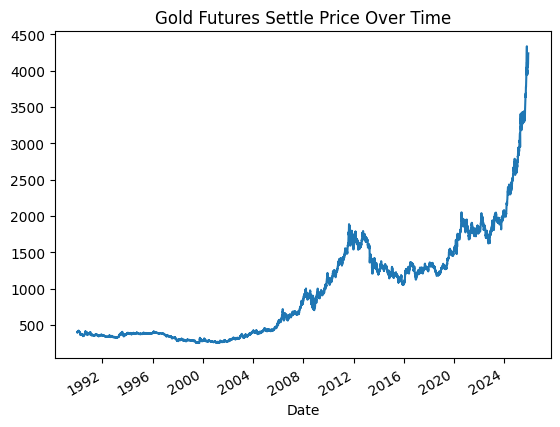

In [6]:
gold = pd.read_csv(notebook_dir.parent.parent / 'confidential_data' / 'LSEG' / 'gold_futures_GCc1.xls', index_col='Date', parse_dates=['Date'])
gold['SETTLE'].plot(title='Gold Futures Settle Price Over Time')

In [8]:
# get dates with nan
nan_dates = gold[gold['SETTLE'].isna()].index.tolist()
len(nan_dates)

88

In [8]:
vix.describe()

,vix
count,9534.000000
mean,19.528007
std,7.679016
min,9.140000
25%,14.080000
50%,17.710000
75%,22.810000
max,82.690000


In [26]:
oil_returns = oil.pct_change(fill_method=None).rename('oil_return')
oil_returns = oil_returns.dropna()
oil_returns.describe()

count    10672.000000
mean         0.000041
std          0.040592
min         -3.059661
25%         -0.010885
50%          0.000436
75%          0.012037
max          0.376623
Name: oil_return, dtype: float64

<Axes: xlabel='date'>

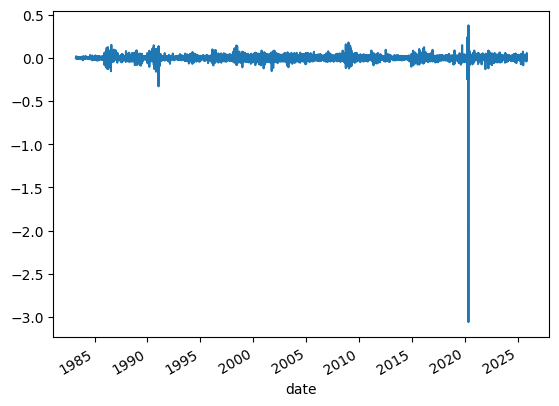

In [27]:
oil_returns.plot()

In [28]:
# starting from observation 241, create sequence of last 240 oil returns
oil_return_sequences = []
sequence_length = 240
for i in range(sequence_length, len(oil_returns)):
    oil_return_sequences.append(oil_returns.iloc[i-sequence_length:i].values)
oil_return_sequences = pd.DataFrame({'date': oil_returns.index[sequence_length:], 'oil_return_sequence': oil_return_sequences})
oil_return_sequences

,date,oil_return_sequence
0,1984-03-22,"[-0.0037414965986394266, 0.005121201775349915,..."
1,1984-03-23,"[0.005121201775349915, 0.009171195652173836, 0..."
2,1984-03-26,"[0.009171195652173836, 0.006395153147088495, 0..."
3,1984-03-27,"[0.006395153147088495, 0.009030100334448177, 0..."
4,1984-03-28,"[0.009030100334448177, 0.006960556844547439, -..."
...,...,...
10427,2025-10-20,"[0.028493308389696326, 0.0072757800475724554, ..."
10428,2025-10-21,"[0.0072757800475724554, -0.004167245450756973,..."
10429,2025-10-22,"[-0.004167245450756973, 0.009345794392523477, ..."
10430,2025-10-23,"[0.009345794392523477, -0.027363184079602032, ..."


Add oil return sequence to data

In [29]:
data = data.merge(oil_return_sequences, on='date', how='left')
data

,stock,date,return,return_sequence,Class0,Class1,oil_return_sequence
0,AAPL.OQ,1995-12-14,-0.234178,"[1.394498323671849, -0.7586869737490951, 4.413...",0,1,"[0.0022573363431153126, -0.018018018018018056,..."
1,AAPL.OQ,1995-12-15,-4.410867,"[-0.7586869737490951, 4.413022075404569, -1.10...",1,0,"[-0.018018018018018056, 0.002293577981651307, ..."
2,AAPL.OQ,1995-12-18,-4.781735,"[4.413022075404569, -1.107362639359629, 3.2968...",1,0,"[0.002293577981651307, 0.013729977116704761, -..."
3,AAPL.OQ,1995-12-19,0.808120,"[-1.107362639359629, 3.2968035916089224, 3.841...",0,1,"[0.013729977116704761, -0.0028216704288936967,..."
4,AAPL.OQ,1995-12-20,-0.265260,"[3.2968035916089224, 3.8414088805262936, -1.68...",0,1,"[-0.0028216704288936967, -0.015280135823429686..."
...,...,...,...,...,...,...,...
357253,YUM.N,1998-12-24,-0.843838,"[-0.053213536111970855, -0.053213536111970855,...",1,0,"[-0.02003535651149091, -0.009621166566446182, ..."
357254,YUM.N,1998-12-28,0.019698,"[-0.053213536111970855, 1.2759710805489741, 0....",0,1,"[-0.009621166566446182, -0.0024286581663630624..."
357255,YUM.N,1998-12-29,1.403128,"[1.2759710805489741, 0.33621466901724584, 1.49...",0,1,"[-0.0024286581663630624, 0.00121728545343891, ..."
357256,YUM.N,1998-12-30,1.862632,"[0.33621466901724584, 1.4936913670391696, -0.6...",0,1,"[0.00121728545343891, -0.006686930091185372, 0..."
